In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Load the sales data
file_path = 'Sales-Dataset2.xlsx'
sales_df = pd.read_excel(file_path)

# Preview the dataset
print("Preview of the data:")
print(sales_df.head())

Preview of the data:
        Date  Customer_Age       Age_Group Customer_Gender    Country  \
0 2013-11-26            19     Youth (<25)               M     Canada   
1 2015-11-26            19     Youth (<25)               M     Canada   
2 2014-03-23            49  Adults (35-64)               M  Australia   
3 2016-03-23            49  Adults (35-64)               M  Australia   
4 2014-05-15            47  Adults (35-64)               F  Australia   

              State Product_Category Sub_Category              Product  \
0  British Columbia      Accessories   Bike Racks  Hitch Rack - 4-Bike   
1  British Columbia      Accessories   Bike Racks  Hitch Rack - 4-Bike   
2   New South Wales      Accessories   Bike Racks  Hitch Rack - 4-Bike   
3   New South Wales      Accessories   Bike Racks  Hitch Rack - 4-Bike   
4   New South Wales      Accessories   Bike Racks  Hitch Rack - 4-Bike   

   Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  Revenue  
0               8         45 

In [4]:
### 1. Data Cleaning

In [3]:
# Check for missing values
print("\nMissing values:")
print(sales_df.isnull().sum())


Missing values:
Date                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


In [4]:
# Fill missing numerical values with 0 and categorical values with 'Unknown' (If there were any in a dataset)
sales_df.fillna(
    {
        'Order_Quantity': 0,
        'Unit_Cost': 0,
        'Unit_Price': 0,
        'Profit': 0,
        'Cost': 0,
        'Revenue': 0,
        'Customer_Gender': 'Unknown',
        'Age_Group': 'Unknown',
        'Country': 'Unknown',
        'State': 'Unknown',
    }, inplace=True
)

In [5]:
# Convert Date to datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [6]:
### 2. Data Aggregation

In [7]:
# Total Revenue and Profit by Year and Month
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Month'] = sales_df['Date'].dt.month

aggregated_data = sales_df.groupby(['Year', 'Month']).agg(
    Total_Revenue=('Revenue', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

print("\nAggregated data by Year and Month:")
print(aggregated_data.head())


Aggregated data by Year and Month:
   Year  Month  Total_Revenue  Total_Profit
0  2011      1         675193        212849
1  2011      2         637598        207144
2  2011      3         708517        226404
3  2011      4         698782        223601
4  2011      5         734537        234689


In [ ]:
## Top-Selling Products by Revenue

In [8]:
top_products = sales_df.groupby('Product').agg(
    Total_Revenue=('Revenue', 'sum')
).sort_values(by='Total_Revenue', ascending=False).reset_index()

print("\nTop 5 products by revenue:")
print(top_products.head())


Top 5 products by revenue:
                   Product  Total_Revenue
0         Road-150 Red, 62        3829416
1   Mountain-200 Black, 38        3366248
2         Road-150 Red, 52        3180840
3         Road-150 Red, 56        3158805
4  Mountain-200 Silver, 42        3081078


In [ ]:
## Customer Demographics Analysis

In [9]:
customer_demo = sales_df.groupby(['Age_Group', 'Customer_Gender']).size().reset_index(name='Customer_Count')

print("\nCustomer demographics analysis:")
print(customer_demo.head())


Customer demographics analysis:
              Age_Group Customer_Gender  Customer_Count
0        Adults (35-64)               F           27500
1        Adults (35-64)               M           28324
2         Seniors (64+)               F             334
3         Seniors (64+)               M             396
4  Young Adults (25-34)               F           18724


In [ ]:
## Seasonal Sales Performance

In [10]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

sales_df['Season'] = sales_df['Month'].apply(get_season)

seasonal_sales = sales_df.groupby('Season').agg(
    Total_Revenue=('Revenue', 'sum'),
    Total_Orders=('Order_Quantity', 'sum')
).reset_index()

print("\nSeasonal sales performance:")
print(seasonal_sales)


Seasonal sales performance:
   Season  Total_Revenue  Total_Orders
0  Autumn       18081262        320156
1  Spring       23786677        355267
2  Summer       20475660        321497
3  Winter       22927409        348396


In [ ]:
### 3. Visualization

In [4]:
# Revenue and Profit Trends
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=aggregated_data, x='Month', y='Total_Revenue', hue='Year', marker='o')
# plt.title('Monthly Revenue Trends by Year')
# plt.xlabel('Month')
# plt.ylabel('Total Revenue')
# plt.legend(title='Year')
# plt.grid()
# plt.show()

# Using Plotly
fig1 = px.line(aggregated_data, x='Month', y='Total_Revenue', color='Year', title='Monthly Revenue Trends by Year')
fig1.update_layout(xaxis_title='Month', yaxis_title='Total Revenue')
fig1.show()

NameError: name 'aggregated_data' is not defined

C:\Users\nyouseflavi\AppData\Local\Temp\ipykernel_28120\1421221241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products.head(10), x='Total_Revenue', y='Product', palette='viridis')


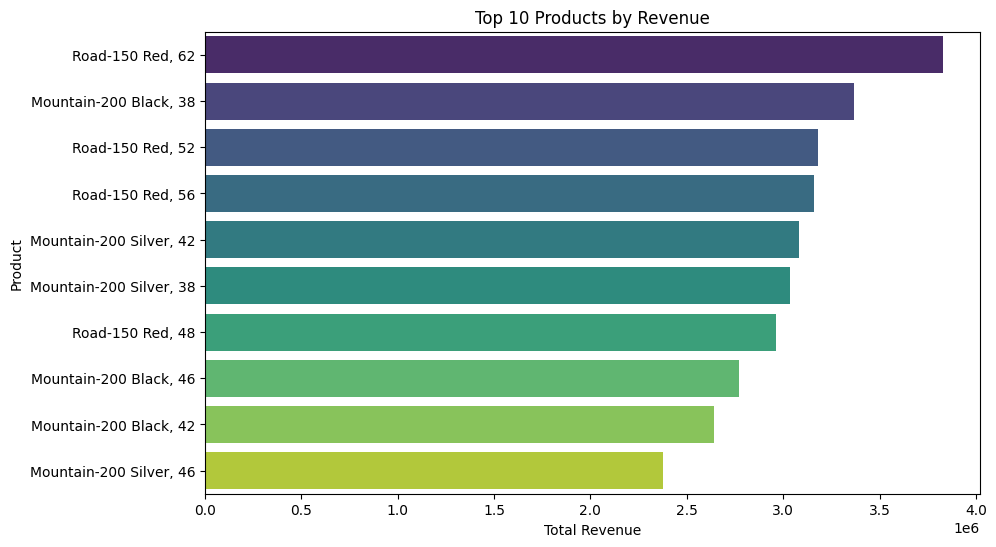

In [19]:
# Top Products Bar Chart
# plt.figure(figsize=(10, 6))
# sns.barplot(data=top_products.head(10), x='Total_Revenue', y='Product', palette='viridis')
# plt.title('Top 10 Products by Revenue')
# plt.xlabel('Total Revenue')
# plt.ylabel('Product')
# plt.show()

fig2 = px.bar(top_products.head(10), x='Product', y='Total_Revenue', title='Top 10 Products by Revenue', 
              color='Total_Revenue', color_continuous_scale='Viridis')
fig2.update_layout(xaxis_title='Product', yaxis_title='Total Revenue')
fig2.show()

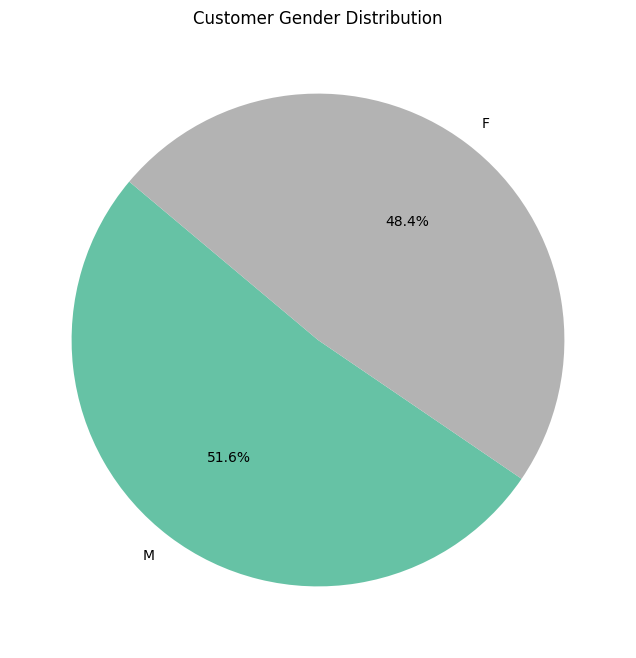

In [20]:
# Customer Demographics Pie Chart
# customer_gender = sales_df['Customer_Gender'].value_counts()
# plt.figure(figsize=(8, 8))
# customer_gender.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set2')
# plt.title('Customer Gender Distribution')
# plt.ylabel('')
# plt.show()

fig3 = px.pie(customer_demo, names='Customer_Gender', values='Customer_Count', title='Customer Gender Distribution')
fig3.show()

In [ ]:
# Seasonal Sales Performance (Bar Chart)
fig4 = px.bar(seasonal_sales, x='Season', y='Total_Revenue', title='Seasonal Sales Performance', 
              color='Total_Revenue', color_continuous_scale='Plasma')
fig4.update_layout(xaxis_title='Season', yaxis_title='Total Revenue')
fig4.show()